# Session 1: Oneway

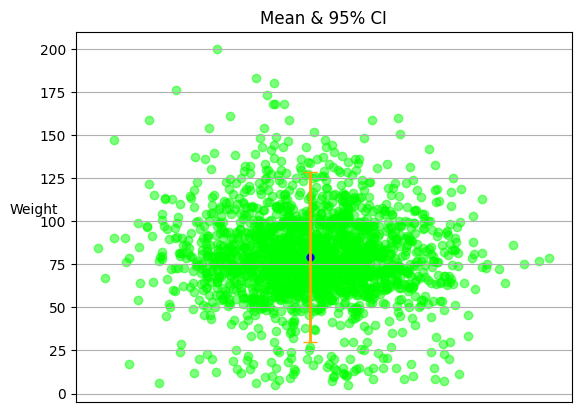

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import io

# Load the data from the URL using requests
url = 'https://raw.githubusercontent.com/jhustata/livre/main/transplants.txt'
response = requests.get(url)
content = response.content.decode('utf-8')
file = io.StringIO(content)
data = pd.read_csv(file, sep='\t')

# Extract relevant columns
weight = data['don_wgt_kg']
x = [1] * len(weight)

# Calculate mean and standard deviation
mean_weight = weight.mean()
std_weight = weight.std()

# Calculate upper and lower bounds for 95% confidence interval
ub = mean_weight + std_weight * 1.96
lb = mean_weight - std_weight * 1.96

# Add jitter to x-axis values centered around 1
x_jitter = 1 + np.random.normal(0, 0.02, size=len(weight))

# Scatter plot of weight with increased jitter
plt.scatter(x_jitter, weight, c='lime', alpha=0.5)

# Confidence interval with thicker line
plt.errorbar(1, mean_weight, yerr=[[mean_weight - lb], [ub - mean_weight]], color='orange', linewidth=2, capsize=5)

# Mean point
plt.scatter(1, mean_weight, c='blue', s=25)

# Styling
plt.ylabel('Weight', rotation='horizontal')
plt.title('Mean & 95% CI')
plt.xticks([])
plt.grid(axis='y')

# Save the figure
plt.savefig('mean_95ci.png')
plt.show()


 
The scatter plot visualizes the distribution of the 'weight' variable in the dataset. Each point corresponds to one data entry. The blue dot represents the mean weight value. The orange lines above and below the mean represent the 95% confidence interval for the mean weight. This means that we are 95% confident that the true mean weight lies within this interval.  
  
Here are some exercises to help you master the concepts introduced:  

Exercise 1: Try using a different dataset and apply the same analysis. What differences do you notice in the distribution and the mean?  

Exercise 2: Experiment with different levels of jitter. How does changing the jitter affect the visualization?  

Exercise 3: Calculate the confidence interval at a different confidence level, such as 90% or 99%. How does this change the interval?  

Certainly! Here's a revamped suggestion for Session 1, focusing on one-way analysis and statistical summaries:

Session 1: One-Way Analysis and Statistical Summaries

1. Introduction to One-Way Analysis:
   - Overview of one-way analysis and its applications
   - Understanding the concept of a categorical independent variable and continuous dependent variable

2. Importing and Exploring Data:
   - Using Stata to import datasets for analysis
   - Exploring the structure, variables, and summary statistics of the dataset

3. Descriptive Statistics:
   - Computing and interpreting descriptive statistics (mean, median, standard deviation, etc.) using Stata
   - Summarizing and visualizing distributions of continuous variables

4. Group Comparisons:
   - Comparing group means using t-tests or non-parametric tests (Mann-Whitney U test) in Stata
   - Interpreting the test results and assessing the significance of differences between groups

5. Box Plots and Bar Plots:
   - Creating box plots and bar plots to visualize group differences in Stata
   - Customizing the appearance and labels of the plots

6. ANOVA (Analysis of Variance):
   - Introduction to ANOVA and its use for comparing means across multiple groups
   - Performing one-way ANOVA in Stata
   - Interpreting ANOVA output, including F-statistic and p-value

7. Post-hoc Tests:
   - Conducting post-hoc tests (e.g., Tukey's HSD, Bonferroni) to identify specific group differences after ANOVA
   - Adjusting for multiple comparisons and interpreting the post-hoc results

8. Effect Size and Power Analysis:
   - Understanding effect size measures (e.g., Cohen's d, eta-squared) to quantify the magnitude of group differences
   - Introduction to power analysis and sample size considerations for one-way analysis

9. Case Study and Practice:
   - Applying one-way analysis techniques to a real-world dataset
   - Analyzing group differences, interpreting results, and drawing conclusions
   - Discussing the practical implications of the findings

Throughout the session, provide hands-on exercises and examples to allow students to apply the concepts in Stata. Encourage students to bring their own datasets or choose examples of interest to them for analysis. This will promote engagement and practical application of the learned techniques.


